In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [7]:
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

In [8]:
X.shape, y.shape

((100, 1), (100,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

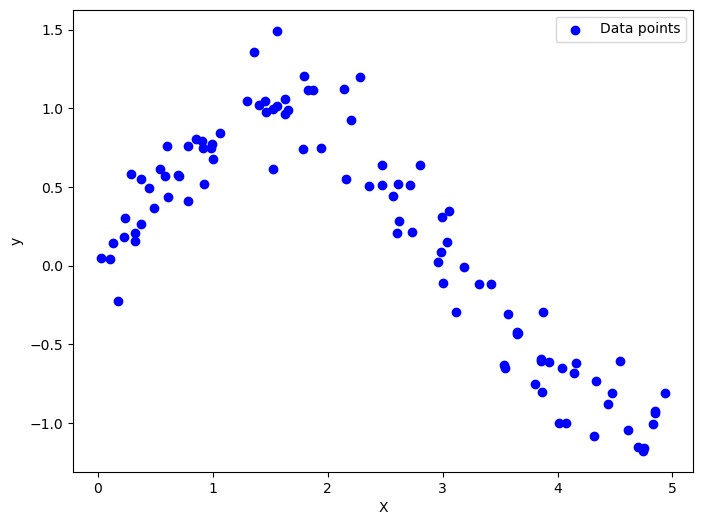

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [16]:
# Define polynomial degree
degree = 10

# Regular Polynomial Regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X_train, y_train)

# Ridge Regression (L2)
ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
ridge_reg.fit(X_train, y_train)

# Lasso Regression (L1)
lasso_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1, max_iter=1000))
lasso_reg.fit(X_train, y_train)

/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.558e+00, tolerance: 4.021e-03
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('lasso', Lasso(alpha=0.1))])

In [15]:
ridge_reg.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures(degree=10)),
  ('ridge', Ridge())],
 'transform_input': None,
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(degree=10),
 'ridge': Ridge(),
 'polynomialfeatures__degree': 10,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

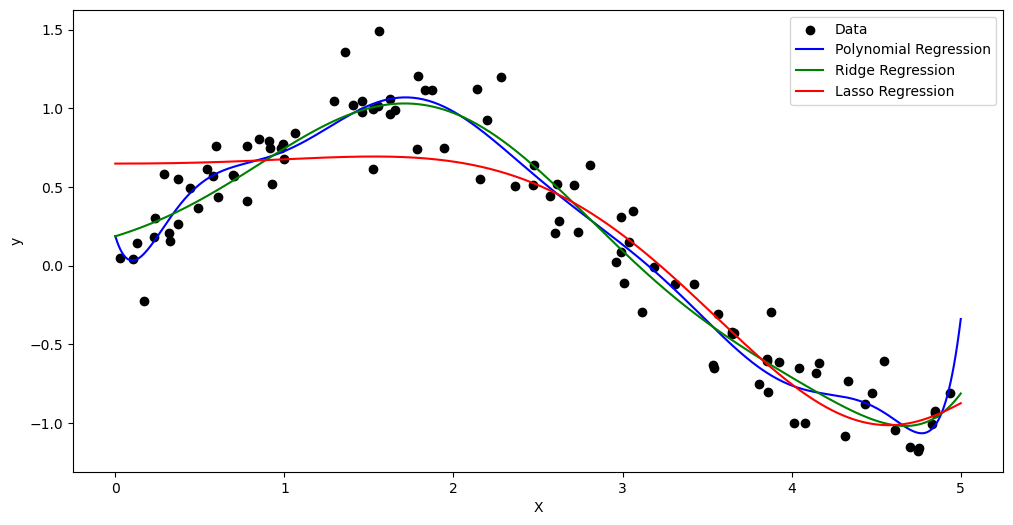

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='black', label='Data')

X_plot = np.linspace(0, 5, 500).reshape(-1, 1)
plt.plot(X_plot, poly_reg.predict(X_plot), label='Polynomial Regression', color='blue')
plt.plot(X_plot, ridge_reg.predict(X_plot), label='Ridge Regression', color='green')
plt.plot(X_plot, lasso_reg.predict(X_plot), label='Lasso Regression', color='red')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.514e+00, tolerance: 4.244e-03
  model = cd_fast.enet_coordinate_descent(


🔴 Ridge Regression MSE: 0.1386
🔵 Lasso Regression MSE: 0.0353


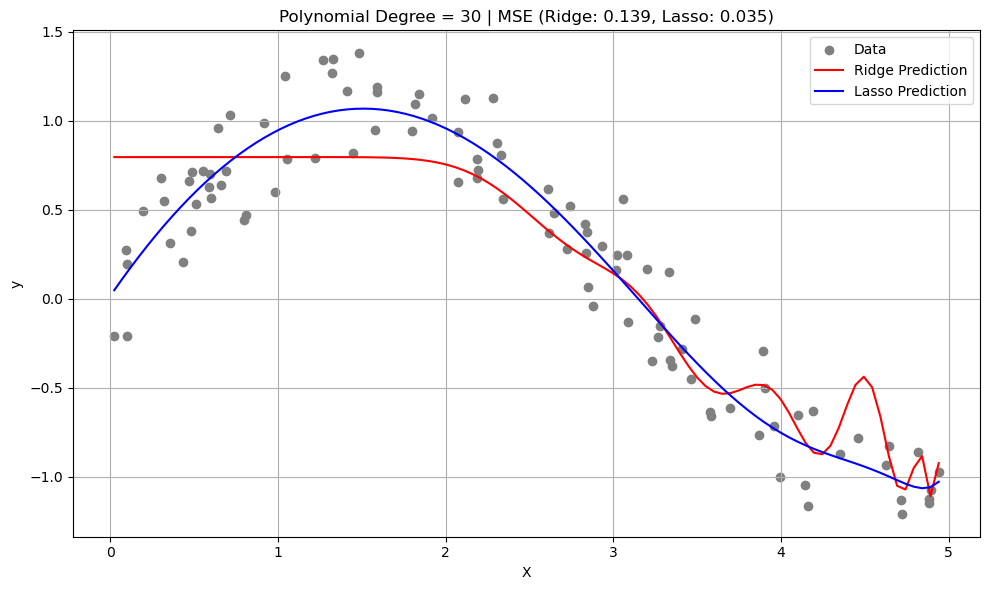

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 30

ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.00001))
lasso_model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.00001, max_iter=10000))

# 5. تدريب النماذج
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# 6. توقع واختبار الأداء
y_ridge_pred = ridge_model.predict(X_test)
y_lasso_pred = lasso_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_ridge_pred)
mse_lasso = mean_squared_error(y_test, y_lasso_pred)

print(f"🔴 Ridge Regression MSE: {mse_ridge:.4f}")
print(f"🔵 Lasso Regression MSE: {mse_lasso:.4f}")

# 7. رسم المنحنيات
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_ridge_curve = ridge_model.predict(X_plot)
y_lasso_curve = lasso_model.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='Data')
plt.plot(X_plot, y_ridge_curve, color='red', label='Ridge Prediction')
plt.plot(X_plot, y_lasso_curve, color='blue', label='Lasso Prediction')
plt.title(f"Polynomial Degree = {degree} | MSE (Ridge: {mse_ridge:.3f}, Lasso: {mse_lasso:.3f})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
